# Loading data

In [2]:
import numpy as np
data=np.load('/content/drive/MyDrive/Colab Notebooks/data.npy')
target=np.load('/content/drive/MyDrive/Colab Notebooks/target.npy')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Building model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:], kernel_initializer='orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200,activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(50,activation='tanh'))
model.add(Dense(10,activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 128)       512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 22, 22, 64)        2

## **Augmentation**

In [4]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.1,
                        horizontal_flip=True, fill_mode='nearest')

## Trainning

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [6]:
from keras.callbacks import ModelCheckpoint

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/models/model-{epoch:03d}.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss',save_best_only=True,mode='auto')

model.fit(aug.flow(train_data,train_target,batch_size=32),validation_data=(test_data, test_target), epochs=100, callbacks=[checkpoint])

Epoch 1/100
622/624 [============================>.] - ETA: 0s - loss: 0.6878 - accuracy: 0.5614

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 28s 31ms/step - loss: 0.6878 - accuracy: 0.5615 - val_loss: 0.6395 - val_accuracy: 0.6351
Epoch 2/100
624/624 [==============================] - 17s 28ms/step - loss: 0.6485 - accuracy: 0.6235 - val_loss: 0.6251 - val_accuracy: 0.6463
Epoch 3/100
624/624 [==============================] - 18s 29ms/step - loss: 0.6237 - accuracy: 0.6524 - val_loss: 0.5774 - val_accuracy: 0.6958
Epoch 4/100
624/624 [==============================] - 17s 28ms/step - loss: 0.5910 - accuracy: 0.6844 - val_loss: 0.5560 - val_accuracy: 0.7297
Epoch 5/100
624/624 [==============================] - 17s 27ms/step - loss: 0.5700 - accuracy: 0.7063 - val_loss: 1.0860 - val_accuracy: 0.5102
Epoch 6/100
624/624 [==============================] - 17s 27ms/step - loss: 0.5528 - accuracy: 0.7190 - val_loss: 0.6731 - val_accuracy: 0.6044
Epoch 7/100
624/624 [==============================] - 19s 30ms/step - loss: 0.5316 - accuracy: 0.7369 - val_loss: 0.4750 - val_accuracy: 0.77

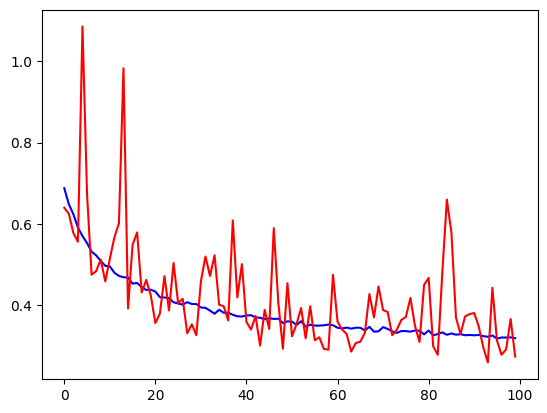

In [7]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],'b')
plt.plot(model.history.history['val_loss'],'r')